In [1]:
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as plt

import clonosGP as cln

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
DATA1 = pnd.read_csv('results/cll_Schuh_2012_CLL003.csv')
DATA2 = pnd.read_csv('results/cll_Schuh_2012_CLL006.csv')
DATA3 = pnd.read_csv('results/cll_Schuh_2012_CLL077.csv')
DATA4 = pnd.read_csv('results/cll_Rincon_2019_patient2.csv')

In [4]:
%load_ext rpy2.ipython
%R library(tidyverse)
%R library(patchwork)


✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



array(['patchwork', 'forcats', 'stringr', 'dplyr', 'purrr', 'readr',
       'tidyr', 'tibble', 'ggplot2', 'tidyverse', 'tools', 'stats',
       'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base'],
      dtype='<U9')

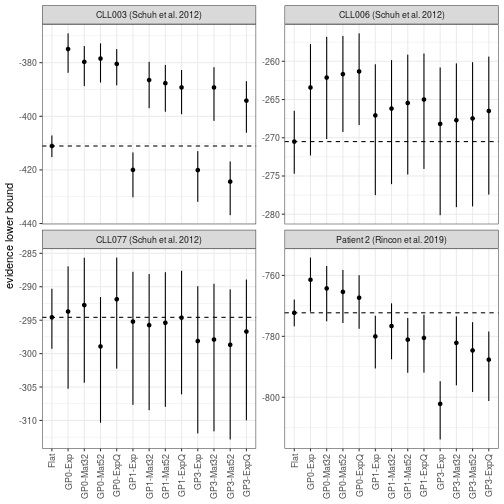

In [9]:
%%R -i DATA1,DATA2,DATA3,DATA4 -w 7 -h 7 --units in

df = bind_rows(
    DATA1 %>% mutate(DATASET = 'CLL003 (Schuh et al. 2012)'),
    DATA2 %>% mutate(DATASET = 'CLL006 (Schuh et al. 2012)'),
    DATA3 %>% mutate(DATASET = 'CLL077 (Schuh et al. 2012)'),
    DATA4 %>% mutate(DATASET = 'Patient 2 (Rincon et al. 2019)')
) %>%
    filter(METRIC == 'LOSS', LIK == 'BBin', PRIOR != 'GP2') %>%
    mutate(LABEL = if_else(PRIOR == 'Flat', 'Flat', str_c(PRIOR, COV, sep='-'))) %>%
    mutate(LABEL = factor(LABEL, levels = unique(.$LABEL)))

hlines = df %>% filter(LABEL == 'Flat') 

df %>%
    ggplot() +
    geom_hline(aes(yintercept = -MEDIAN), data = hlines, linetype = 'dashed') +
    geom_linerange(aes(x = LABEL, ymin=-HIGH, ymax=-LOW)) +
    geom_point(aes(x = LABEL, y = -MEDIAN)) +    
    facet_wrap(~DATASET, nrow=2, scales = 'free_y') +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
    labs(x=NULL, y='evidence lower bound')
    
# ggsave('tmp.pdf')